In [1]:
from pycocotools.coco import COCO
import numpy as np
import cv2
import os

def create_masks(annotation_file, image_dir, output_mask_dir):
    # Load COCO annotations
    coco = COCO(annotation_file)
    os.makedirs(output_mask_dir, exist_ok=True)

    # Get all image IDs
    img_ids = coco.getImgIds()

    for img_id in img_ids:
        # Load image metadata
        img_info = coco.loadImgs(img_id)[0]
        img_path = os.path.join(image_dir, img_info['file_name'])

        # Load annotations for the image
        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)

        # Create a blank mask (same size as the image)
        mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)

        # Draw each annotation on the mask
        for ann in anns:
            if 'segmentation' in ann:
                if isinstance(ann['segmentation'], list):  # Polygon format
                    for seg in ann['segmentation']:
                        pts = np.array(seg).reshape(-1, 2)
                        cv2.fillPoly(mask, [pts.astype(np.int32)], color=255)

        # Save the mask as a PNG file
        mask_path = os.path.join(output_mask_dir, img_info['file_name'].replace('.jpg', '.png'))
        cv2.imwrite(mask_path, mask)

# Example usage for the train split:
train_annotation_file = 'Dataset/train/_annotations.coco.json'
train_image_dir = 'Dataset/train/images/'
train_mask_dir = 'Dataset/train/masks/'

create_masks(train_annotation_file, train_image_dir, train_mask_dir)

# Repeat this process for validation and test splits:
val_annotation_file = 'Dataset/valid/_annotations.coco.json'
val_image_dir = 'Dataset/valid/images/'
val_mask_dir = 'Dataset/valid/masks/'

create_masks(val_annotation_file, val_image_dir, val_mask_dir)

test_annotation_file = 'Dataset/test/_annotations.coco.json'
test_image_dir = 'Dataset/test/images/'
test_mask_dir = 'Dataset/test/masks/'

create_masks(test_annotation_file, test_image_dir, test_mask_dir)


ModuleNotFoundError: No module named 'pycocotools'

In [6]:
import cv2
import numpy as np

def preprocess_data(image_dir, mask_dir, output_image_size=(128, 128)):
    images = []
    masks = []

    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename.replace('.jpg', '.png'))

        # Load and resize the image and mask
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        img_resized = cv2.resize(img, output_image_size)
        mask_resized = cv2.resize(mask, output_image_size)

        # Normalize data
        images.append(img_resized / 255.0)  # Normalize to [0, 1]
        masks.append(mask_resized / 255.0)  # Normalize to [0, 1]

    return np.array(images), np.array(masks).reshape(-1, output_image_size[0], output_image_size[1], 1)

# Example usage for training data:
X_train, Y_train = preprocess_data('Dataset/train/images/', 'Dataset/train/masks/')
X_val, Y_val = preprocess_data('Dataset/valid/images/', 'Dataset/valid/masks/')
X_test, Y_test = preprocess_data('Dataset/test/images/', 'Dataset/test/masks/')


[ WARN:0@142.919] global loadsave.cpp:241 findDecoder imread_('Dataset/train/masks/.DS_Store'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [8]:
import os
import cv2
import numpy as np

def preprocess_data(image_dir, mask_dir, output_image_size=(128, 128)):
    images = []
    masks = []

    for filename in os.listdir(image_dir):
        # Skip non-image files
        if not (filename.endswith('.jpg') or filename.endswith('.png')):
            continue

        img_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename.replace('.jpg', '.png'))

        # Check if both image and mask exist
        if not os.path.exists(img_path) or not os.path.exists(mask_path):
            print(f"Skipping {filename} as corresponding files are missing.")
            continue

        # Load and resize the image and mask
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Skip if the image or mask is None (failed to load)
        if img is None or mask is None:
            print(f"Skipping {filename} due to loading error.")
            continue

        img_resized = cv2.resize(img, output_image_size)
        mask_resized = cv2.resize(mask, output_image_size)

        # Normalize data
        images.append(img_resized / 255.0)  # Normalize to [0, 1]
        masks.append(mask_resized / 255.0)  # Normalize to [0, 1]

    return np.array(images), np.array(masks).reshape(-1, output_image_size[0], output_image_size[1], 1)

# Example usage for training data:
X_train, Y_train = preprocess_data('Dataset/train/images/', 'Dataset/train/masks/')


In [9]:
def check_dataset_integrity(image_dir, mask_dir):
    image_files = set([f.replace('.jpg', '') for f in os.listdir(image_dir) if f.endswith('.jpg')])
    mask_files = set([f.replace('.png', '') for f in os.listdir(mask_dir) if f.endswith('.png')])

    missing_masks = image_files - mask_files
    missing_images = mask_files - image_files

    if missing_masks:
        print(f"Missing masks for images: {missing_masks}")
    if missing_images:
        print(f"Missing images for masks: {missing_images}")
    if not missing_masks and not missing_images:
        print("Dataset integrity check passed!")

# Example usage:
check_dataset_integrity('Dataset/train/images/', 'Dataset/train/masks/')


Dataset integrity check passed!


In [12]:
# Function to preprocess validation or test data
def preprocess_data(image_dir, mask_dir, output_image_size=(128, 128)):
    images = []
    masks = []

    for filename in os.listdir(image_dir):
        # Skip non-image files
        if not (filename.endswith('.jpg') or filename.endswith('.png')):
            continue

        img_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename.replace('.jpg', '.png'))

        # Check if both image and mask exist
        if not os.path.exists(img_path) or not os.path.exists(mask_path):
            print(f"Skipping {filename} as corresponding files are missing.")
            continue

        # Load and resize the image and mask
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Skip if the image or mask is None (failed to load)
        if img is None or mask is None:
            print(f"Skipping {filename} due to loading error.")
            continue

        img_resized = cv2.resize(img, output_image_size)
        mask_resized = cv2.resize(mask, output_image_size)

        # Normalize data
        images.append(img_resized / 255.0)  # Normalize to [0, 1]
        masks.append(mask_resized / 255.0)  # Normalize to [0, 1]

    return np.array(images), np.array(masks).reshape(-1, output_image_size[0], output_image_size[1], 1)

# Preprocess validation data
X_val, Y_val = preprocess_data('Dataset/valid/images/', 'Dataset/valid/masks/')

# Preprocess test data
X_test, Y_test = preprocess_data('Dataset/test/images/', 'Dataset/test/masks/')


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

def unet_model(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = concatenate([up5, conv3], axis=-1)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = concatenate([up6, conv2], axis=-1)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = concatenate([up7, conv1], axis=-1)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

# Instantiate the model
model = unet_model()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="binary_crossentropy", metrics=["accuracy"])


In [16]:
# Train the model
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    batch_size=16,
    epochs=20,
    verbose=1
)

# Save the trained model
model.save('model.h5')


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


165/165 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9545 - loss: 0.1236 - val_accuracy: 0.9880 - val_loss: 0.0329
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.9904 - loss: 0.0253 - val_accuracy: 0.9943 - val_loss: 0.0130
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.9952 - val_loss: 0.0112
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.9950 - loss: 0.0125 - val_accuracy: 0.9953 - val_loss: 0.0111
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.9948 - loss: 0.0145 - val_accuracy: 0.9952 - val_loss: 0.0115
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9950 - loss: 0.0132 - val_accuracy: 0.9957 - val_loss: 0.0095
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9952 - loss: 0.0129 - val_accuracy: 0.9957 - val_loss: 0.0093
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.9954 - loss: 0.0117 - val_accuracy: 0.995

In [18]:
from tensorflow.keras.models import load_model

# Load the trained U-Net model
model = load_model('lane_detection_unet.h5')


In [40]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(128, 128)):
    # Load the image
    img = cv2.imread(image_path)
    original_size = img.shape[:2]  # Save original size for later resizing
    
    # Resize to match model input size
    img_resized = cv2.resize(img, target_size)
    
    # Normalize pixel values to [0, 1]
    img_normalized = img_resized / 255.0
    
    # Add batch dimension
    img_input = np.expand_dims(img_normalized, axis=0)
    
    return img_input, original_size

# Example usage
image_path = 'Dataset/test/images/kk2.jpg'
img_input, original_size = preprocess_image(image_path)


In [42]:
def predict_mask(model, img_input):
    # Predict the mask
    pred_mask = model.predict(img_input)[0]  # Remove batch dimension
    
    # Convert predicted mask to binary (thresholding)
    pred_mask_binary = (pred_mask > 0.5).astype(np.uint8)  # Threshold at 0.5
    
    return pred_mask_binary

# Predict mask for the test image
predicted_mask = predict_mask(model, img_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


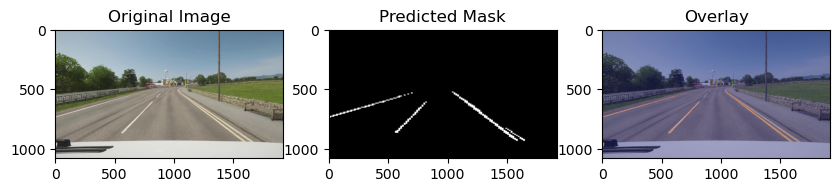

In [44]:
import matplotlib.pyplot as plt

def visualize_prediction(image_path, predicted_mask, original_size):
    # Load the original image
    original_img = cv2.imread(image_path)
    
    # Resize predicted mask back to original size
    pred_mask_resized = cv2.resize(predicted_mask, (original_size[1], original_size[0]))
    
    # Overlay mask on the original image (optional color mapping)
    overlay = cv2.addWeighted(original_img, 0.7, cv2.applyColorMap(pred_mask_resized * 255, cv2.COLORMAP_JET), 0.3, 0)
    
    # Display results
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 3, 2)
    plt.title("Predicted Mask")
    plt.imshow(pred_mask_resized, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    
    plt.show()

# Visualize prediction
visualize_prediction(image_path, predicted_mask, original_size)


In [26]:
import cv2
import numpy as np

def process_video(input_video_path, output_video_path, model, frame_size=(128, 128)):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Define codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use 'MP4V' for .mp4 files
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Preprocess the frame (resize and normalize)
        original_size = frame.shape[:2]
        resized_frame = cv2.resize(frame, frame_size) / 255.0  # Normalize to [0, 1]
        input_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension
        
        # Predict lane mask
        predicted_mask = model.predict(input_frame)[0]  # Remove batch dimension
        predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)  # Threshold at 0.5
        
        # Resize mask back to original size
        mask_resized = cv2.resize(predicted_mask_binary * 255, (original_size[1], original_size[0]))
        
        # Overlay mask on original frame
        overlay = cv2.addWeighted(frame, 0.7, cv2.applyColorMap(mask_resized, cv2.COLORMAP_JET), 0.3, 0)
        
        # Write the processed frame to output video
        out.write(overlay)
    
    # Release resources
    cap.release()
    out.release()
    print(f"Processed video saved to {output_video_path}")

# Example usage:
input_video_path = 'newshit.mp4'
output_video_path = 'output_lane_detection.mp4'
process_video(input_video_path, output_video_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

In [28]:
import cv2
import numpy as np

def process_video(input_video_path, output_video_path, model, frame_size=(128, 128)):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Define codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use 'MP4V' for .mp4 files
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Preprocess the frame (resize and normalize)
        original_size = frame.shape[:2]
        resized_frame = cv2.resize(frame, frame_size) / 255.0  # Normalize to [0, 1]
        input_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension
        
        # Predict lane mask
        predicted_mask = model.predict(input_frame)[0]  # Remove batch dimension
        predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)  # Threshold at 0.5
        
        # Resize mask back to original size
        mask_resized = cv2.resize(predicted_mask_binary * 255, (original_size[1], original_size[0]))
        
        # Overlay mask on original frame
        overlay = cv2.addWeighted(frame, 0.7, cv2.applyColorMap(mask_resized, cv2.COLORMAP_JET), 0.3, 0)
        
        # Write the processed frame to output video
        out.write(overlay)
    
    # Release resources
    cap.release()
    out.release()
    print(f"Processed video saved to {output_video_path}")

# Example usage:
input_video_path = 'newshit.mp4'  # Path to your input video file
output_video_path = 'output.mp4'  # Path to save the masked video
process_video(input_video_path, output_video_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

In [30]:
def play_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        cv2.imshow('Masked Video', frame)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):  # Press 'q' to exit
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage:
play_video('output_lane_detection.mp4')


2025-03-27 19:08:01.887 python[65827:8591438] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-27 19:08:01.887 python[65827:8591438] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [32]:
import cv2
import numpy as np

def process_video(input_video_path, output_video_path, model, frame_size=(128, 128)):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Define codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use 'MP4V' for .mp4 files
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)  # Grayscale output
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Preprocess the frame (resize and normalize)
        original_size = frame.shape[:2]
        resized_frame = cv2.resize(frame, frame_size) / 255.0  # Normalize to [0, 1]
        input_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension
        
        # Predict lane mask
        predicted_mask = model.predict(input_frame)[0]  # Remove batch dimension
        predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)  # Threshold at 0.5
        
        # Resize mask back to original size
        mask_resized = cv2.resize(predicted_mask_binary * 255, (original_size[1], original_size[0]))
        
        # Write the processed mask (white lanes on black background) to output video
        out.write(mask_resized)
    
    # Release resources
    cap.release()
    out.release()
    print(f"Processed video saved to {output_video_path}")

# Example usage:
input_video_path = 'test_video.mp4'  # Path to your input video file
output_video_path = 'output_lane_detection.mp4'  # Path to save the masked video
process_video(input_video_path, output_video_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

In [34]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('lane_detection_unet.h5')

def process_live_feed(model, frame_size=(128, 128)):
    # Initialize video capture (0 for default webcam, or use the camera index)
    cap = cv2.VideoCapture(0)  # Replace 0 with camera index for external cameras

    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Preprocess the frame (resize and normalize)
        original_size = frame.shape[:2]
        resized_frame = cv2.resize(frame, frame_size) / 255.0  # Normalize to [0, 1]
        input_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension

        # Predict lane mask
        predicted_mask = model.predict(input_frame)[0]  # Remove batch dimension
        predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)  # Threshold at 0.5

        # Resize mask back to original size
        mask_resized = cv2.resize(predicted_mask_binary * 255, (original_size[1], original_size[0]))

        # Overlay mask on original frame
        overlay = cv2.addWeighted(frame, 0.7, cv2.applyColorMap(mask_resized, cv2.COLORMAP_JET), 0.3, 0)

        # Display the result
        cv2.imshow('Lane Detection', overlay)

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run live feed lane detection
process_live_feed(model)


[03/27 19:20:25.489781][info][8591438][Context.cpp:69] Context created with config: default config!
[03/27 19:20:25.489813][info][8591438][Context.cpp:74] Context work_dir=/Users/kkartikaggarwal/Desktop/coding folder/lane detection2
[03/27 19:20:25.489815][info][8591438][Context.cpp:77] 	- SDK version: 1.9.4
[03/27 19:20:25.489816][info][8591438][Context.cpp:78] 	- SDK stage version: main
[03/27 19:20:25.489818][info][8591438][Context.cpp:82] get config EnumerateNetDevice:false
[03/27 19:20:25.490014][info][8591438][MacPal.cpp:36] createObPal: create MacPal!
[03/27 19:20:25.490891][info][8591438][MacPal.cpp:104] Create PollingDeviceWatcher!
[03/27 19:20:25.490901][info][8591438][DeviceManager.cpp:15] Current found device(s): (0)
[03/27 19:20:25.490917][info][8591438][Pipeline.cpp:15] Try to create pipeline with default device.
[03/27 19:20:25.490919][warning][8591438][ObException.cpp:5] No device found, fail to create pipeline!
[03/27 19:20:25.492676][info][8591438][Context.cpp:90] Con

OpenCV: not authorized to capture video (status 0), requesting...
OpenCV: camera failed to properly initialize!
[ WARN:0@8499.354] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!




In [36]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('lane_detection_unet.h5')

def process_live_feed(model, frame_size=(128, 128)):
    # Initialize video capture (0 for default webcam, or use the camera index)
    cap = cv2.VideoCapture(0)  # Replace 0 with camera index for external cameras

    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Preprocess the frame (resize and normalize)
        original_size = frame.shape[:2]
        resized_frame = cv2.resize(frame, frame_size) / 255.0  # Normalize to [0, 1]
        input_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension

        # Predict lane mask
        predicted_mask = model.predict(input_frame)[0]  # Remove batch dimension
        predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)  # Threshold at 0.5

        # Resize mask back to original size
        mask_resized = cv2.resize(predicted_mask_binary * 255, (original_size[1], original_size[0]))

        # Overlay mask on original frame
        overlay = cv2.addWeighted(frame, 0.7, cv2.applyColorMap(mask_resized, cv2.COLORMAP_JET), 0.3, 0)

        # Display the result
        cv2.imshow('Lane Detection', overlay)

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run live feed lane detection
process_live_feed(model)


2025-03-27 19:20:33.007 python[65827:8591438] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

In [38]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('lane_detection_unet.h5')

def process_live_feed_mask_only(model, frame_size=(128, 128)):
    # Initialize video capture (0 for default webcam, or use the camera index)
    cap = cv2.VideoCapture(0)  # Replace 0 with camera index for external cameras

    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Preprocess the frame (resize and normalize)
        original_size = frame.shape[:2]
        resized_frame = cv2.resize(frame, frame_size) / 255.0  # Normalize to [0, 1]
        input_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension

        # Predict lane mask
        predicted_mask = model.predict(input_frame)[0]  # Remove batch dimension
        predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)  # Threshold at 0.5

        # Resize mask back to original size
        mask_resized = cv2.resize(predicted_mask_binary * 255, (original_size[1], original_size[0]))

        # Display the binary mask (white lanes on black background)
        cv2.imshow('Lane Detection - Mask Only', mask_resized)

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run live feed lane detection with masked video
process_live_feed_mask_only(model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━

In [47]:
keras --version


NameError: name 'keras' is not defined

In [49]:
import keras
print(keras.__version__)


3.8.0


In [51]:
import tensorflow as tf
print(tf.__version__)


2.17.0
